# Data wrangling and visualization in R

*Karolina M. Sienkiewicz*

The notebook below contains exemplary solutions to workshop exercises Q1-Q7. Usually there is more than one way to arrive at the solution.

## Notebook and workshop setup

1. Place the [.vcf.gz file](https://drive.google.com/drive/folders/1n8_LLYvl69EvAGBgk-08Re3SoCcdAC5L?usp=drive_link) in a directory on your google drive.
2. Mount the directory (by the default the notebook executes py3). Remember to grant Collab all permisions.
3. Navigate to workshop directory using bash commands

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%bash
cd /content/drive/MyDrive/Data_wrangling_workshop
ls

DataWrangling&Vis_class.ipynb
hg38.chrom.sizes
images
Trio.subset.vcf.gz


4. Load R Magic. To execute R commands following up, use "%%R" at the begining of a code block.

In [3]:
%load_ext rpy2.ipython

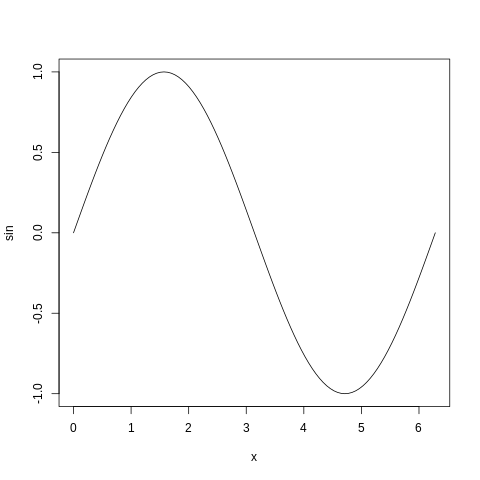

In [4]:
%%R
plot(sin, 0, 2*pi)

5. Install R libraries

In [ ]:
%%R
install.packages('tidyverse')
install.packages("data.table")
install.packages("R.utils") #needed by data.table
install.packages("ggupset")
install.packages("PNWColors")

Check if libraries are loading without an issue. As long as you don't see any errors, you are good to go!

In [6]:
%%R
library(tidyverse)
library(data.table)
library(ggupset)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘data.table’



    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year



    between, first, last



    transpose




## Tidyverse

### Why use tidyverse?

- [curated collection](https://www.tidyverse.org/packages) of packages for data science
- packages share data classes and grammar
- low entry threshold
- database-like approach
- **aes**thetically pleasing visualizations
- big community and great resources online
- seamless plotting integration

### Pipe operator %>%

It allows as to chain operations together for convenience and better readability.


In [7]:
%%R
as.character(round(mean(seq(100))))

[1] "50"


In [8]:
%%R
seq(100) %>%
  mean() %>%
  round() %>%
  as.character()

[1] "50"


### Basic tidyverse operations

Here are some useful commands you can use to explore your data. Included figures are taken from the [*Data Wrangling with dplyr nd tidyr Cheat Sheet*](https://rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf).

#### (1) Subsetting data

- use **select** to select columns by names (or helper function)

![dplyr_select](https://drive.google.com/uc?export=view&id=1Ju0PmbyrJyHiMN9I25UY_ic-YCSpQmwi)

- use **filter** to select rows that meet logical criteria / select rows based on value in specific column

![dplyr_filter](https://drive.google.com/uc?export=view&id=15878fskt7w0_GnCl8cg0DAEIecNSMX-3)

#### (2) Ordering data

- use **arrange** to order your rows by a column value (from row to high)

- combine **arrange** with **desc** to reverse the order

#### (3) Updating your data

- use **mutate** to add new columns or change values in existing columns

- use **separate** to separate values in column into multiple columns and **unite** to reverse the process

![dplyr_mutate](https://drive.google.com/uc?export=view&id=1IIfGEsICqjDN0Bls4Xexve8HRDiNM2PV)

#### (4) Grouping and summarizing data

- use **group_by** to group the rows based on value in column -> it will add additional layer of organization for other functions

- use **summarise** to summarise your data into single row of values, combine it with **group_by** to calculate statistics for your groups

![dplyr_mutate](https://drive.google.com/uc?export=view&id=1WhYyWTBMZM63RSx9OEOCrybKwHTEcNFU)

#### (5) Combining data sets

- use **left_join** or **right_join** to add columns from one data set to compatible rows of second data set

- use **inner_join** to combine data sets and preserve only common rows

- use **full_join** to combine data sets and preserve all rows

![dplyr_mutate](https://drive.google.com/uc?export=view&id=1qBMl1pggH7gNxqlGJIgbv1FAzPKfpMuA)


Handy overwiew of tidyverse operations with non-genomic examples is available [here](https://github.com/sienkie/R_for_data_science/blob/master/R_for_data_science.pdf).

## The Variant Calling Format (VCF)

![vcf_spec](https://drive.google.com/uc?export=view&id=1KeRCKL_qaaOVD9fB26nJTL0lg-_JeyFn)

Example source [VCF Specification v4.2](https://samtools.github.io/hts-specs/VCFv4.2.pdf)

Let's load the example dataset and take a look!

In [ ]:
%%R
setwd("/content/drive/MyDrive/Data_wrangling_workshop")
fname="Trio.subset.vcf.gz"
fread(fname, skip='#CHROM', verbose=FALSE) %>% as_tibble() -> data

In [10]:
%%R
# What are the columns in our dataset?
data %>% colnames()

 [1] "#CHROM" "POS"    "ID"     "REF"    "ALT"    "QUAL"   "FILTER" "INFO"  
 [9] "FORMAT" "HG002"  "HG003"  "HG004" 


In [11]:
%%R
# Optional: Remove # from first column name for convenience.
colnames(data)[1] <- "CHROM"
data %>% colnames()

 [1] "CHROM"  "POS"    "ID"     "REF"    "ALT"    "QUAL"   "FILTER" "INFO"  
 [9] "FORMAT" "HG002"  "HG003"  "HG004" 


In [12]:
%%R
data

# A tibble: 504,941 × 12
   CHROM    POS ID    REF   ALT     QUAL FILTER INFO    FORMAT HG002 HG003 HG004
   <chr>  <int> <chr> <chr> <chr>  <int> <chr>  <chr>   <chr>  <chr> <chr> <chr>
 1 chr1  602113 .     T     TGCCCA    50 PASS   platfo… GT:PS… 1/1:… ./.:… 1/1:…
 2 chr1  602439 .     C     T         50 PASS   platfo… GT:PS… ./.:… 0/1:… ./.:…
 3 chr1  602493 .     C     T         50 PASS   platfo… GT:PS… ./.:… 0/1:… ./.:…
 4 chr1  602494 .     A     G         50 PASS   platfo… GT:PS… ./.:… 0/1:… ./.:…
 5 chr1  604358 .     G     C         50 PASS   platfo… GT:PS… 1/1:… ./.:… 1/1:…
 6 chr1  604360 .     T     C         50 PASS   platfo… GT:PS… 1/1:… ./.:… 1/1:…
 7 chr1  605970 .     T     C         50 PASS   platfo… GT:PS… ./.:… ./.:… 0/1:…
 8 chr1  611317 .     A     G         50 PASS   platfo… GT:PS… 1/1:… ./.:… ./.:…
 9 chr1  631859 .     CG    C         50 PASS   platfo… GT:PS… 1/1:… 1/1:… ./.:…
10 chr1  779047 .     G     A         50 PASS   platfo… GT:PS… 1/1:… 1/1:… 1/1:…
# ℹ

In [13]:
%%R
# Tidyverse tip: De-selecting some columns does not remove them, but is handy for data exploration
data %>% select(-INFO, -FILTER)

# A tibble: 504,941 × 10
   CHROM    POS ID    REF   ALT     QUAL FORMAT               HG002  HG003 HG004
   <chr>  <int> <chr> <chr> <chr>  <int> <chr>                <chr>  <chr> <chr>
 1 chr1  602113 .     T     TGCCCA    50 GT:PS:DP:ADALL:AD:GQ 1/1:.… ./.:… 1/1:…
 2 chr1  602439 .     C     T         50 GT:PS:DP:ADALL:AD:GQ ./.:.… 0/1:… ./.:…
 3 chr1  602493 .     C     T         50 GT:PS:DP:ADALL:AD:GQ ./.:.… 0/1:… ./.:…
 4 chr1  602494 .     A     G         50 GT:PS:DP:ADALL:AD:GQ ./.:.… 0/1:… ./.:…
 5 chr1  604358 .     G     C         50 GT:PS:DP:ADALL:AD:GQ 1/1:.… ./.:… 1/1:…
 6 chr1  604360 .     T     C         50 GT:PS:DP:ADALL:AD:GQ 1/1:.… ./.:… 1/1:…
 7 chr1  605970 .     T     C         50 GT:PS:DP:ADALL:AD:GQ ./.:.… ./.:… 0/1:…
 8 chr1  611317 .     A     G         50 GT:PS:DP:ADALL:AD:GQ 1/1:.… ./.:… ./.:…
 9 chr1  631859 .     CG    C         50 GT:PS:DP:ADALL:AD:GQ 1/1:.… 1/1:… ./.:…
10 chr1  779047 .     G     A         50 GT:PS:DP:ADALL:AD:GQ 1/1:.… 1/1:… 1/1:…
# ℹ

### Warm-up
- W1: Which genotype fields are present in our file? What it their meaning?
- W2: How many samples are present in the dataset? How many variants in total?
- W3: How many chromosomes are present in the dataset?


In [14]:
%%R
data$FORMAT %>% unique()

[1] "GT:PS:DP:ADALL:AD:GQ"


In [ ]:
%%R
data %>% colnames() # columns HG002 - HG004 are samples

In [18]:
%%R
data %>% nrow() # variants

[1] 504941


In [15]:
%%R
data$CHROM %>% unique()

[1] "chr1"  "chr21"


### Data wrangling - basic exercises
- Q1: How many different genotypes were observed in HG002 variants?
- Q2: How many "novel" (non-overlapping with parents) variants of HG002 were called?
- Q3: How many unique SNVs (single-nucleotide substitutions) were called for HG002? How many indels?



In [ ]:
%%R
data %>%
  separate(HG002, c("HG002_GT", "HG002"), sep=":", extra = "merge") %>%
  filter(HG002_GT != "./.") %>%
  group_by(HG002_GT) %>%
  summarise(n=n())
# This is a good sanity check: we now now there is no missing values and all diploid genotypes as expected

# A tibble: 5 × 2
  HG002_GT      n
  <chr>     <int>
1 0/1      220636
2 1/0         792
3 1/1      148448
4 1/2        1639
5 2/1        3044


In [ ]:
%%R
data %>%
  filter(HG002 != "./.:.:.:.:.:.") %>%
  mutate(father = HG003 != "./.:.:.:.:.:.", mother = HG004 != "./.:.:.:.:.:.") %>%
  group_by(father, mother) %>%
  summarise(n=n())

`summarise()` has grouped output by 'father'. You can override using the
`.groups` argument.
# A tibble: 4 × 3
# Groups:   father [2]
  father mother      n
  <lgl>  <lgl>   <int>
1 FALSE  FALSE    6874
2 FALSE  TRUE    75329
3 TRUE   FALSE   71053
4 TRUE   TRUE   221303


In [ ]:
%%R
#SNVs
data %>%
  separate(HG002, c("HG002_GT", "HG002"), sep=":", extra = "merge") %>%
  filter(HG002_GT != "./.") %>%
  mutate(diff=abs(nchar(REF)-nchar(ALT))) %>%
  filter(diff==0) %>%
  summarise(n=n())

# A tibble: 1 × 1
       n
   <int>
1 318186


In [ ]:
%%R
#indels
data %>%
  separate(HG002, c("HG002_GT", "HG002"), sep=":", extra = "merge") %>%
  filter(HG002_GT != "./.") %>%
  mutate(diff=abs(nchar(REF)-nchar(ALT))) %>%
  filter(diff!=0) %>%
  summarise(n=n())

# A tibble: 1 × 1
      n
  <int>
1 56373


In [ ]:
%%R
# more complicated example - one-line annotation of SNVs, insertions and deletions
data %>%
  separate(HG002, c("HG002_GT", "HG002"), sep=":", extra = "merge") %>%
  filter(HG002_GT != "./.") %>%
  mutate(diff=nchar(REF)-nchar(ALT)) %>%
  mutate(type=ifelse(diff==0, "SNV", ifelse(diff>0, "DEL", "INS"))) %>%
  group_by(type) %>%
  summarise(n=n())

# A tibble: 3 × 2
  type       n
  <chr>  <int>
1 DEL    25369
2 INS    31004
3 SNV   318186


### Data wrangling - wide vs long data
Q4: Compare number of SNV's and indels across different samples. Hint: use gather to transform sample columns into a new variable.

In [20]:
%%R
data %>%
  gather(sample, sample_data, HG002, HG003, HG004) %>%
  separate(sample_data, c("GT", "sample_data"), sep=":", extra = "merge") %>%
  filter(GT != "./.") %>%
  mutate(diff=abs(nchar(REF)-nchar(ALT))) %>%
  mutate(type=ifelse(diff==0, "SNV", ifelse(diff>0, "DEL", "INS"))) %>%
  group_by(sample, type) %>%
  summarise(n=n()) -> var_comparison
var_comparison

`summarise()` has grouped output by 'sample'. You can override using the
`.groups` argument.
# A tibble: 6 × 3
# Groups:   sample [3]
  sample type       n
  <chr>  <chr>  <int>
1 HG002  DEL    56373
2 HG002  SNV   318186
3 HG003  DEL    54063
4 HG003  SNV   310164
5 HG004  DEL    55631
6 HG004  SNV   320652


Given the number of records in the tibble, it starts to be a bit difficult to compare the samples quickly, so let's try plottting them!

### How to plot with ggplot2?

The ggplot2 has very specific grammar, which provides the rules on how to effectively create plots. We
construct the plots step, by step by adding additional levels of organization. This layering of plot elements
provides us with a great control over our plot and high level of possible customization. Take a look at this
figure below (created and made available by Coding Club on CC BY 4.0 license) to get preview of what we
are going to do.

![ggplot_fig](https://drive.google.com/uc?export=view&id=1wy8s4PZ1HA0h3qUNuICFNvARCDEIUA6Q)

#### (1) Create base ggplot object
 Here is our plot data. Let's try to plot a comparison of variant abundance across different samples for each variant type.

In [ ]:
%%R
var_comparison

# A tibble: 6 × 3
# Groups:   sample [3]
  sample type       n
  <chr>  <chr>  <int>
1 HG002  DEL    56373
2 HG002  SNV   318186
3 HG003  DEL    54063
4 HG003  SNV   310164
5 HG004  DEL    55631
6 HG004  SNV   320652


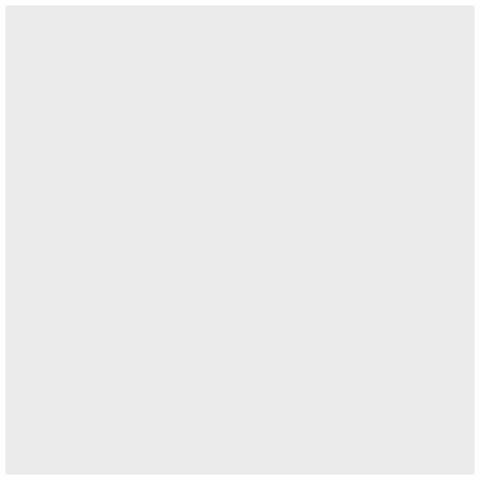

In [ ]:
%%R
var_comparison %>%
  ggplot()

Well. . . that didn’t work. However, we didn’t even specify what we want to plot yet so it’s understandable.

#### (2) Add aesthetics to the plot.
Aesthetics specify what we want to plot (map variables to x and y axis and other parts of plot such as its color).

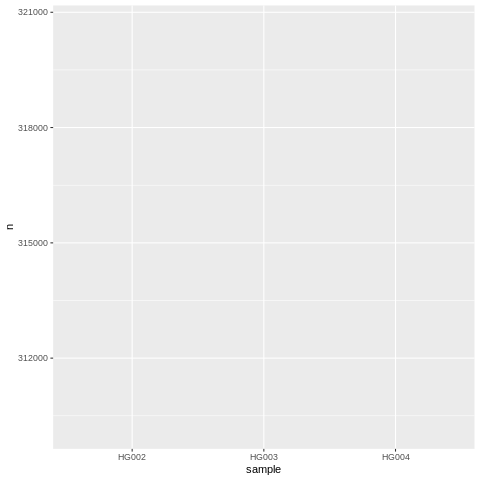

In [ ]:
%%R
var_comparison %>%
  filter(type=="SNV") %>% #let's temporary focus on one type of variant
  ggplot(aes(x=sample, y=n))

That’s a good start. Now the question is how exactly we want to show the data?

#### (3) Add geometric layers
There is many different types of plots. Here because we want to show a difference in a categorical variable across groups (samples), let’s aim for simple barplot.

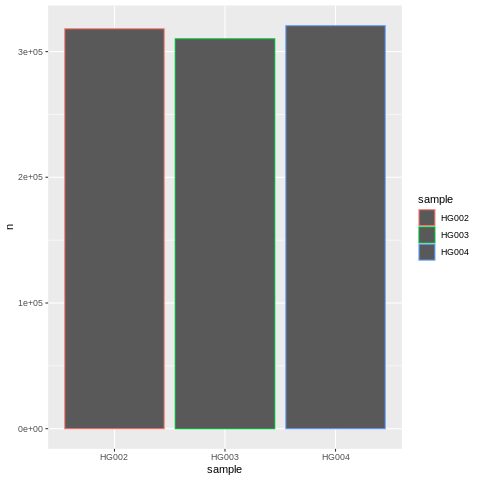

In [ ]:
# we use 'identity' when we build barplot with x and y values,
#by defult it requires only x values
%%R
var_comparison %>%
  filter(type=="SNV") %>% #let's temporary focus on one type of variant
  ggplot(aes(x=sample, y=n, color=sample)) +
  geom_bar(stat="identity")

My friends and foes we have a plot! Only. . . the colors are not quite alright. What happened? ggplot uses two different parameters for setting colors, in general color/colour defines the color of the geom outline and fill specifies what color the geom is filled with. Let’s correct it!

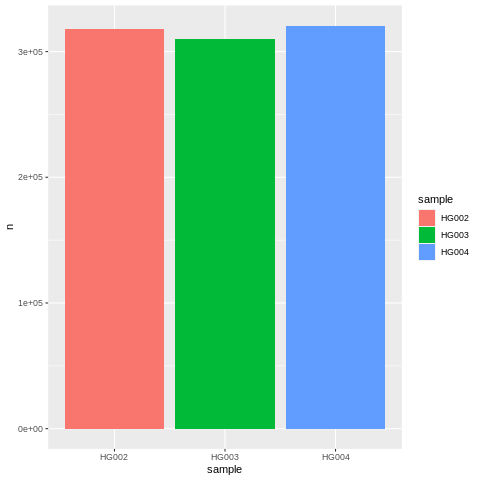

In [ ]:
%%R
var_comparison %>%
  filter(type=="SNV") %>% #let's temporary focus on one type of variant
  ggplot(aes(x=sample, y=n, fill=sample)) +
  geom_bar(stat="identity")

Note about aes() placement. By placing aesthetics in ggplot() function, they will be applied to every geom function. I recommend binding our aesthetics to specific geoms instead. This way we can mix and match geoms with different mappings (which you can do by adding geoms with '+').

Great now that we have a base plot for SNV, time to figure out how to plot all variant types together. Let's explore two options: (1) filling bars with colors depending on variant type and (2) spliting plot into separate panels for each variant type.


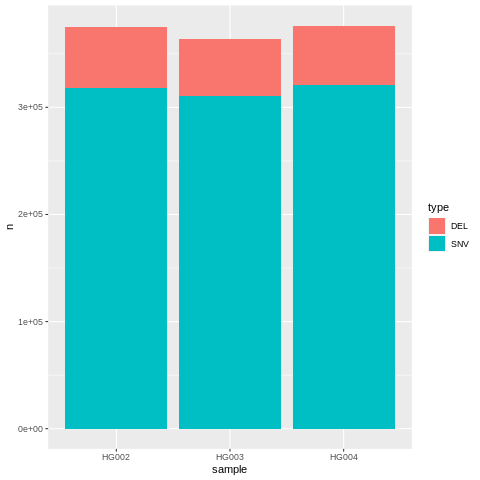

In [ ]:
%%R
var_comparison %>%
  ggplot(aes(x=sample, y=n, fill=type)) +
  geom_bar(stat="identity")

#### (4) Faceting

 Faceting generates small multiples each showing a different subset of the data. Two basics commands *facet_wrap* and *facet_grid* allow to split plots according to specified variable values. *facet_wrap* makes a ribbon of plots and wraps it in 2d space (per specified number of columns and rows), and *facet_grid* splits plots in 2d space specified by two variables.

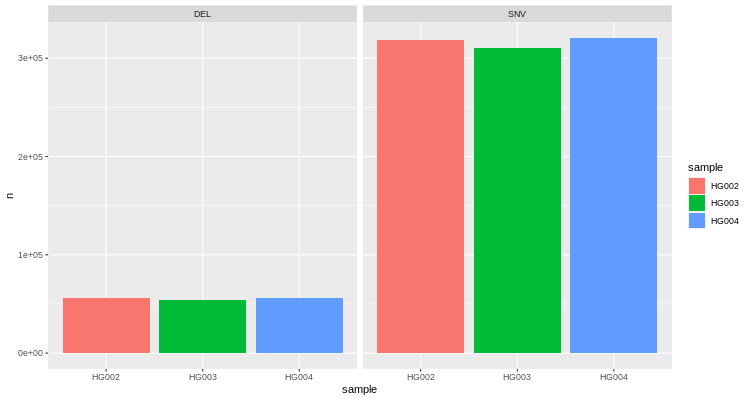

In [ ]:
%%R -w 750 -h 400 -u px
# above arguments change plot dimensions in the google collab
var_comparison %>%
  ggplot(aes(x=sample, y=n, fill=sample)) +
  geom_bar(stat="identity") +
  facet_wrap(type~.)

#### (5) Customizing your plots.

We definitely cannot cover all the different way you can improve your plot, but here are some examples of possible customizations:
- updating axis labels and title (all can be changed with *labs* function, or by adding *xlab*, *ylab* and *ggtitle*)
- add a bit of transparency to our bars (with *alpha* parameter) so we can see our grid a bit better
- changing color palette to color-blind friendly palette
- adding new *theme* to our plot (quick change of plot appearance, see more [*here*](https://ggplot2.tidyverse.org/reference/ggtheme.html) and [*here*](https://github.com/jrnold/ggthemes))
- editing our theme, ex. to change legend placements, removing legend altogether if it’s not needed or
changing fonts

Also not applicable here (but frequently usefull):
• changing axis limits (with *xlim* and *ylim*)
• changing shape of data points
• adding error bars / error bar ribbons (*geom_errorbar*/*geom_ribbon*)
• fitting linear model to scatter plots (*geom_smooth()* with method = "lm")

Let’s add some of that to our plot!


In [ ]:
%%R
library(PNWColors) # great library, with color-blind friendly palettes

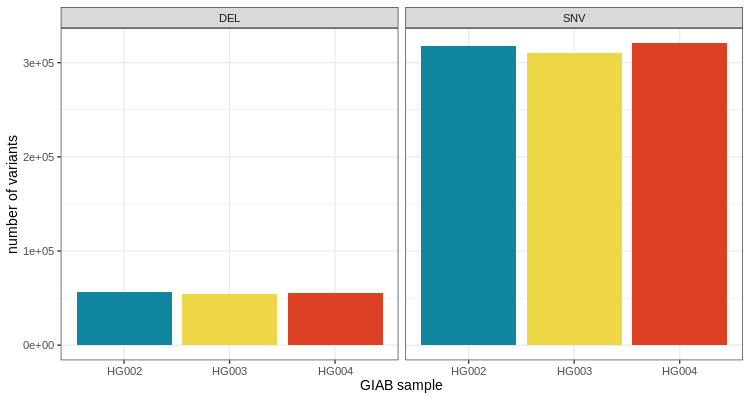

In [ ]:
%%R -w 750 -h 400 -u px
# above arguments change plot dimensions in the google collab
var_comparison %>%
  ggplot(aes(x=sample, y=n, fill=sample)) +
  geom_bar(stat="identity") +
  facet_wrap(type~.) +
  theme_bw(base_size=14) +
  theme(legend.position="null") +
  scale_fill_manual(values = pnw_palette("Bay",3)) +
  labs(x="GIAB sample", y="number of variants")

More resources:
- Easy plot joining and figure creation with [cowplot](https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html)
- Jounal color palettes with [ggsci](https://nanx.me/ggsci/index.html)
- More ggplot examples with explanations - [Elegant Graphics for Data Analysis](https://ggplot2-book.org/) by  Hadley Wickham, Danielle Navarro, and Thomas Lin Pedersen.
- [Data Visualization: A Practical Introduction.](https://socviz.co/index.html) by Kieran Healy

### Data wrangling & visualization - putting it all together

- Q5: Which chromosome in HG002 had the most deletions?
- Q6: How big of an impact the difference in the deletions/mutation abundance actually is? (Hint: take a look at the other file within our data directory)

Create plots for Q5 and Q6 with comparison across the chromosomes.

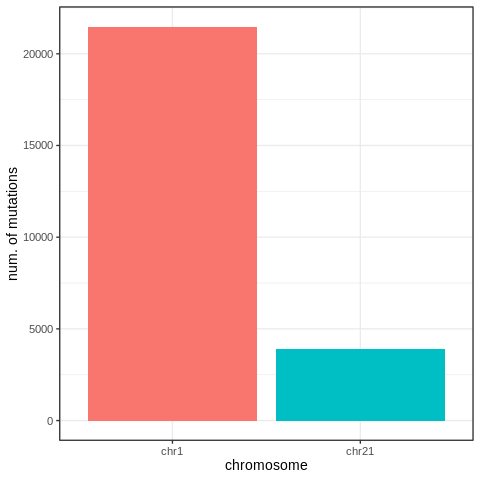

In [ ]:
%%R
data %>%
  separate(HG002, c("HG002_GT", "HG002"), sep=":", extra = "merge") %>%
  filter(HG002_GT != "./.") %>%
  mutate(diff=nchar(REF)-nchar(ALT)) %>%
  filter(diff>0) %>%
  group_by(CHROM) %>%
  summarise(n=n()) %>%
  ggplot() +
    geom_bar(aes(x=CHROM, y=n, fill=CHROM), stat="identity") +
    theme_bw(base_size=14) +
    theme(legend.position = "null") +
    labs(x="chromosome", y="num. of mutations")

Wow, it looks like chr1 has vastly more mutations, however for genome wide comparison it is important to consider the actual sizes of chromosomes. Let's normalize the abundance value and compare again.

In [ ]:
%%R
# load the chrom sizes file
chrom_sizes <- read_tsv("hg38.chrom.sizes", col_names =c("CHROM", "size"))
chrom_sizes

Rows: 25 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): CHROM
dbl (1): size

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 25 × 2
   CHROM      size
   <chr>     <dbl>
 1 chr1  248956422
 2 chr2  242193529
 3 chr3  198295559
 4 chr4  190214555
 5 chr5  181538259
 6 chr6  170805979
 7 chr7  159345973
 8 chr8  145138636
 9 chr9  138394717
10 chr10 133797422
# ℹ 15 more rows
# ℹ Use `print(n = ...)` to see more rows


`summarise()` has grouped output by 'CHROM'. You can override using the
`.groups` argument.


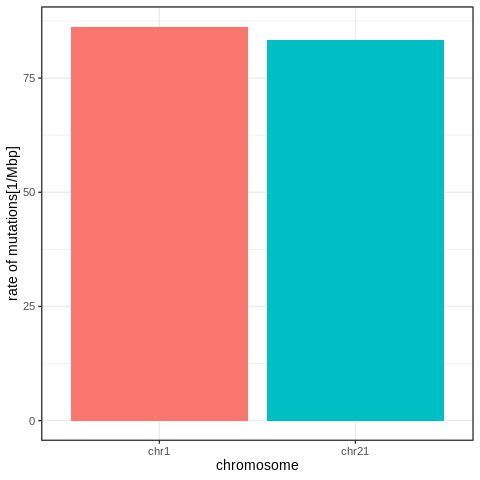

In [ ]:
%%R
data %>%
  left_join(chrom_sizes, by = "CHROM") %>% #adds the columns form chrom_sizes (size) to our data tibble matching by CHROM column value
  separate(HG002, c("HG002_GT", "HG002"), sep=":", extra = "merge") %>%
  filter(HG002_GT != "./.") %>%
  mutate(diff=nchar(REF)-nchar(ALT)) %>%
  filter(diff>0) %>%
  group_by(CHROM, size) %>%
  summarise(n=n()) %>%
  mutate(size=size/10**6, rate=n/size) %>%
  ggplot() +
    geom_bar(aes(x=CHROM, y=rate, fill=CHROM), stat="identity") +
    theme_bw(base_size=14) +
    theme(legend.position = "null") +
    labs(x="chromosome", y="rate of mutations[1/Mbp]")

Now we see, that the difference is not actually that high if the chromosome sizes are taken into consideration.

### Variant allele frequency

Variant allele frequency (VAF) is a metric measuring the proportion of variant alleles within a genomic locus. It is calculated by considering a ratio between alternative allele depth and total depth for alternative and reference alleles.

- Q7: Inspect the distribution VAF for HG002. What does it tells us about HG002 variants?

Start here:

In [ ]:
%%R
data %>%
  select(-ID, -INFO, -QUAL, -HG003, -HG004) %>%
  separate(HG002, c("GT", "PS", "DP", "ADALL", "AD", "GQ"), sep=":") %>%
  filter(GT != "./.") %>%
  head(n=5)

# A tibble: 5 × 12
  CHROM    POS REF   ALT    FILTER FORMAT    GT    PS    DP    ADALL AD    GQ   
  <chr>  <int> <chr> <chr>  <chr>  <chr>     <chr> <chr> <chr> <chr> <chr> <chr>
1 chr1  602113 T     TGCCCA PASS   GT:PS:DP… 1/1   .     93    2,56  2,38  99   
2 chr1  604358 G     C      PASS   GT:PS:DP… 1/1   .     142   0,77  0,45  212  
3 chr1  604360 T     C      PASS   GT:PS:DP… 1/1   .     142   0,77  0,45  212  
4 chr1  611317 A     G      PASS   GT:PS:DP… 1/1   .     815   0,351 0,57  381  
5 chr1  631859 CG    C      PASS   GT:PS:DP… 1/1   .     656   0,245 2,49  306  


Take a good look at the data. Do you see something suspicious?

Why is sum of AD different than DP? Reads for both REF and ALT are counted towards AD only if they are "informative". An "uninformative" read may still pass the filtering quality thresholds, but if the likelihood of the most likely allele given the read is not significantly larger than the likelihood of the second most likely allele it won't be counted. Most liekly allele must be 60% more likely than the second candidate (see [here](https://gatk.broadinstitute.org/hc/en-us/articles/360035532252-Allele-Depth-AD-is-lower-than-expected) for more details).

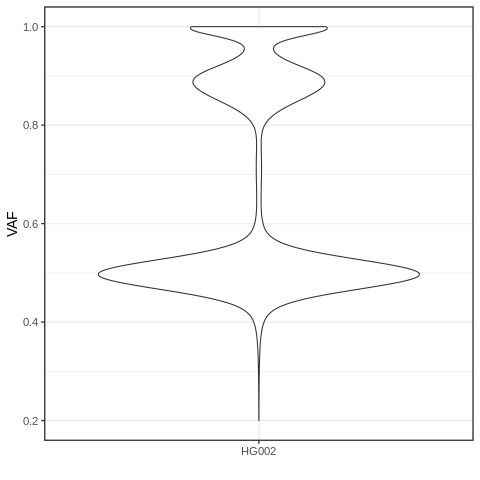

In [ ]:
%%R
data %>%
  separate(HG002, c("GT", "PS", "DP", "ADALL", "AD", "GQ"), sep=":") %>%
  filter(GT != "./.") %>%
  separate(AD, c("AD_REF", "AD_ALT"), sep=",", extra = "drop") %>%
  mutate(AD_ALT=as.integer(AD_ALT), AD_REF=as.integer(AD_REF), VAF = AD_ALT/(AD_REF+AD_ALT)) %>%
  ggplot() +
    geom_violin(aes(x="HG002", y=VAF)) + #we are using a constant here for x-axis
    theme_bw(base_size=14) + labs(x="")

What does the three population visible on above violin plot mean? How will the distribution changes if you only take into consideration only the HG002 variants also found in parents?

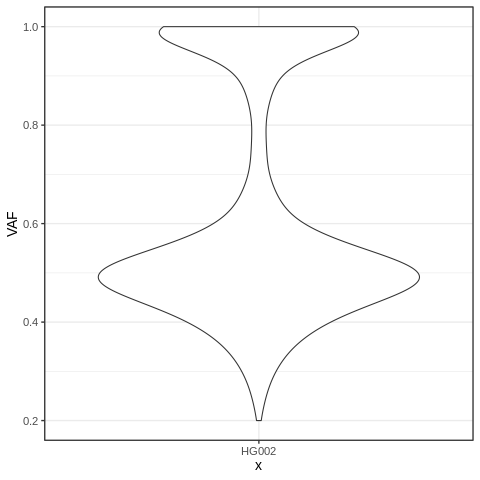

In [ ]:
%%R
data %>%
  separate(HG002, c("GT", "PS", "DP", "ADALL", "AD", "GQ"), sep=":") %>%
  filter(GT != "./." & HG003 == "./.:.:.:.:.:." & HG004 == "./.:.:.:.:.:.") %>%
  separate(AD, c("AD_REF", "AD_ALT"), sep=",", extra = "drop") %>%
  mutate(AD_ALT=as.integer(AD_ALT), AD_REF=as.integer(AD_REF), VAF = AD_ALT/(AD_REF+AD_ALT)) %>%
  ggplot() +
  geom_violin(aes(x="HG002", y=VAF)) +
  theme_bw(base_size=14)


In most cases the VAF around 50% and 100% designates a germline variant. The third population observed in first plot are somatic variants of HG002.

### Good plots have clear purpose  - HW

Our dataset was created based on NIST's GIAB Ashekenazim Trio vcf files (more information is available [here](https://github.com/genome-in-a-bottle/giab_data_indexes)). As such the file contains variants supported by multiple sequencing platforms (see INFO field).
- HW1: Utilize the choosen data wrangling techniques to parse the "Trio.subset.vcf.gz" and check how many of HG002 variant calls are supported by long-read sequenicing technology.
- HW2: We want to explore how many variants were called by multiple platforms across all samples. Create an appropriate plot and describe why did you select this particular type of visualization.

Submit the homework (including the created plot) in one file by email (kms4004@med.cornell.edu).